In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [3]:
# Reference to previous notebook
print("This analysis builds on the data loaded in '01_data_loading.ipynb'")
print("Analyzing healthcare spending patterns across US states for 2020")

This analysis builds on the data loaded in '01_data_loading.ipynb'
Analyzing healthcare spending patterns across US states for 2020


In [4]:
# Load and prepare data (linking from previous notebook)
df = pd.read_csv('../data/raw/kff_healthcare_spending_per_capita_2020.csv', 
                 skiprows=2,
                 thousands=',',
                 nrows=52)

# Display basic information about the dataset
print("\nDataset Overview:")
print("-----------------")
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print("\nColumns in dataset:")
print(df.columns.tolist())

print("\nFirst few rows of raw data:")
display(df.head())


Dataset Overview:
-----------------
Number of rows: 52
Number of columns: 2

Columns in dataset:
['Location', 'Health Spending per Capita']

First few rows of raw data:


,Location,Health Spending per Capita
0,United States,$10191
1,Alabama,$9280
2,Alaska,$13642
3,Arizona,$8756
4,Arkansas,$9338


In [5]:
# Clean the spending data
df['Health Spending per Capita'] = df['Health Spending per Capita'].str.replace('$', '').str.replace(',', '').astype(float)

print("\nFirst few rows after cleaning:")
display(df.head())


First few rows after cleaning:


,Location,Health Spending per Capita
0,United States,10191.0
1,Alabama,9280.0
2,Alaska,13642.0
3,Arizona,8756.0
4,Arkansas,9338.0


In [6]:
# Separate state data from US average
state_data = df[df['Location'] != 'United States'].copy()
us_average = df[df['Location'] == 'United States']['Health Spending per Capita'].values[0]

print("\nBasic Statistics:")
print(f"US Average Spending: ${us_average:,.2f}")
print(f"Number of States (including DC): {len(state_data)}")
print(f"Highest Spending: ${state_data['Health Spending per Capita'].max():,.2f}")
print(f"Lowest Spending: ${state_data['Health Spending per Capita'].min():,.2f}")


Basic Statistics:
US Average Spending: $10,191.00
Number of States (including DC): 51
Highest Spending: $14,381.00
Lowest Spending: $7,522.00


In [7]:
# Define regions
regions = {
    'Northeast': ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 
                 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania'],
    'Midwest': ['Ohio', 'Indiana', 'Illinois', 'Michigan', 'Wisconsin', 'Minnesota', 
                'Iowa', 'Missouri', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas'],
    'South': ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 
              'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 
              'Tennessee', 'Alabama', 'Mississippi', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Montana', 'Idaho', 'Wyoming', 'Colorado', 'New Mexico', 'Arizona', 'Utah', 
             'Nevada', 'Washington', 'Oregon', 'California', 'Alaska', 'Hawaii']
}

In [8]:
# Add region to state_data
state_data['Region'] = state_data['Location'].apply(
    lambda x: next((region for region, states in regions.items() if x in states), 'Other')
)

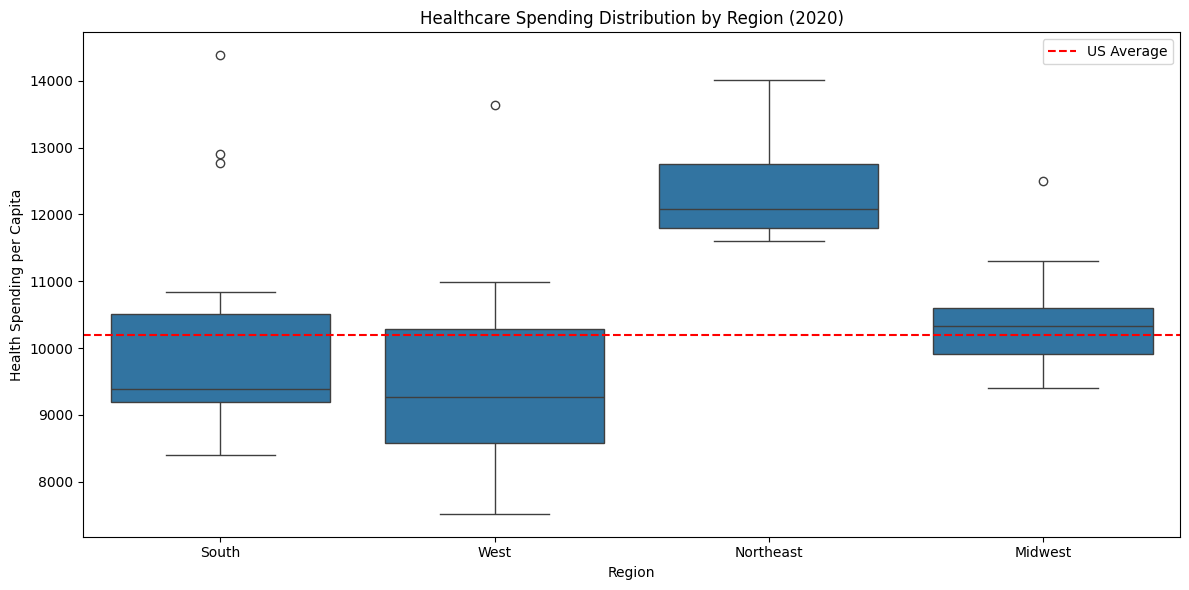

In [9]:
# 1. Regional Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=state_data, x='Region', y='Health Spending per Capita')
plt.axhline(y=us_average, color='r', linestyle='--', label='US Average')
plt.title('Healthcare Spending Distribution by Region (2020)')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
# Regional Analysis (of boxplot)
print("\nRegional Analysis:")
print("-----------------")
for region in regions.keys():
    region_data = state_data[state_data['Region'] == region]
    print(f"\n{region} Region:")
    print(f"Average Spending: ${region_data['Health Spending per Capita'].mean():,.2f}")
    print(f"Highest: ${region_data['Health Spending per Capita'].max():,.2f} ({region_data.loc[region_data['Health Spending per Capita'].idxmax(), 'Location']})")
    print(f"Lowest: ${region_data['Health Spending per Capita'].min():,.2f} ({region_data.loc[region_data['Health Spending per Capita'].idxmin(), 'Location']})")


Regional Analysis:
-----------------

Northeast Region:
Average Spending: $12,400.67
Highest: $14,007.00 (New York)
Lowest: $11,603.00 (Pennsylvania)

Midwest Region:
Average Spending: $10,444.83
Highest: $12,495.00 (South Dakota)
Lowest: $9,408.00 (Kansas)

South Region:
Average Spending: $10,138.76
Highest: $14,381.00 (District of Columbia)
Lowest: $8,406.00 (Texas)

West Region:
Average Spending: $9,617.54
Highest: $13,642.00 (Alaska)
Lowest: $7,522.00 (Utah)


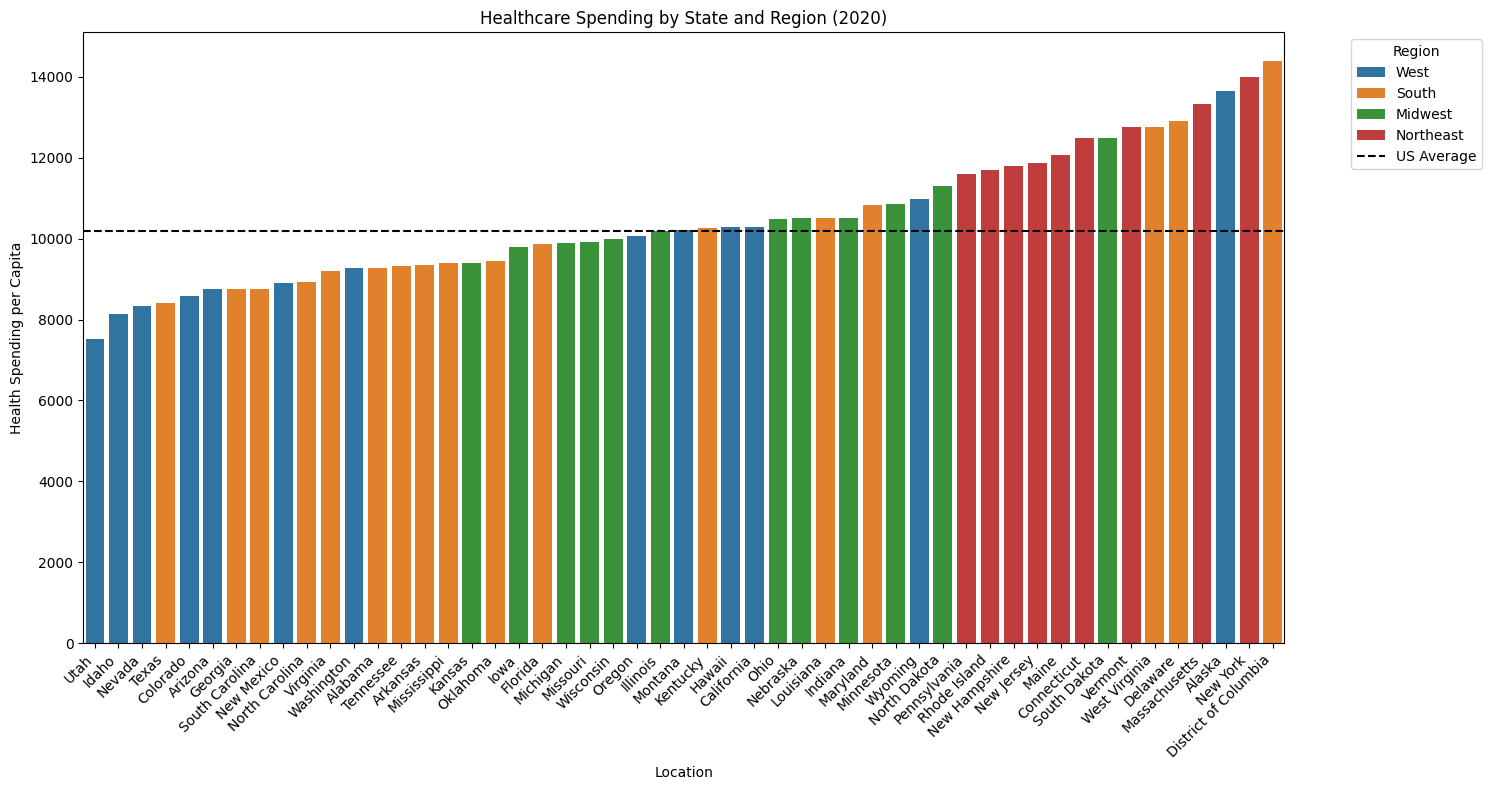

In [11]:
# 2. State Rankings Visualization
plt.figure(figsize=(15, 8))
sns.barplot(data=state_data.sort_values('Health Spending per Capita', ascending=True),
            x='Location',
            y='Health Spending per Capita',
            hue='Region',
            legend=True)
plt.axhline(y=us_average, color='black', linestyle='--', label='US Average')
plt.xticks(rotation=45, ha='right')
plt.title('Healthcare Spending by State and Region (2020)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

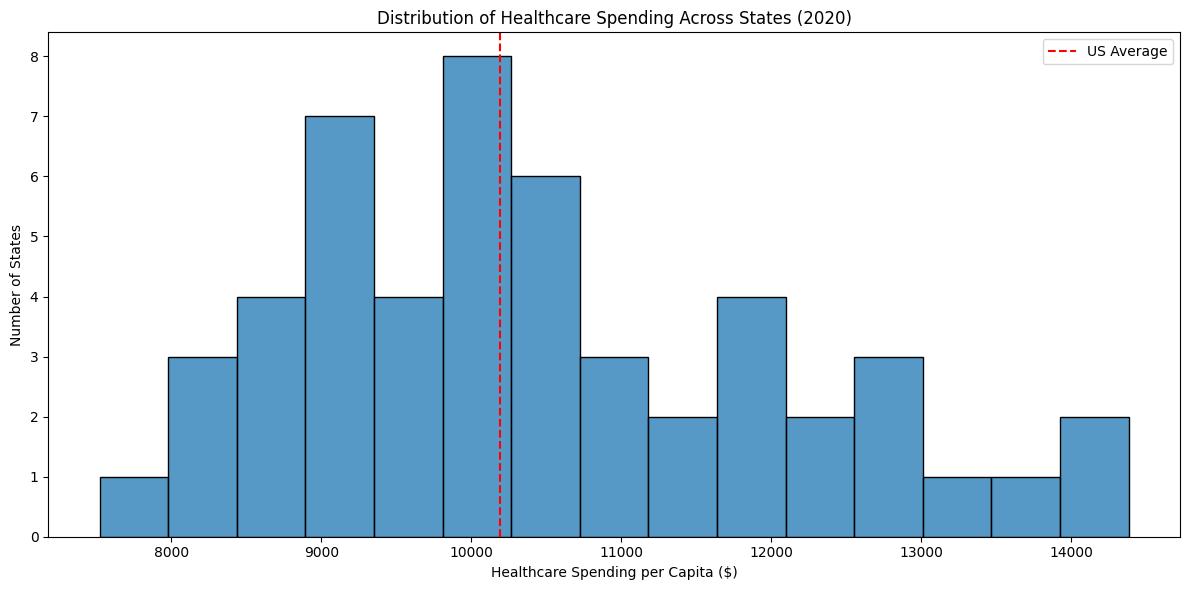

In [12]:
# 3. Distribution Analysis
plt.figure(figsize=(12, 6))
sns.histplot(data=state_data, x='Health Spending per Capita', bins=15)
plt.axvline(x=us_average, color='r', linestyle='--', label='US Average')
plt.title('Distribution of Healthcare Spending Across States (2020)')
plt.xlabel('Healthcare Spending per Capita ($)')
plt.ylabel('Number of States')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
# Calculate and display key statistics
print("\nDetailed Statistical Analysis:")
print("-----------------------------")

# Regional Statistics
regional_stats = state_data.groupby('Region').agg({
    'Health Spending per Capita': ['mean', 'std', 'count', 'min', 'max']
}).round(2)

print("\nRegional Statistics:")
display(regional_stats)


Detailed Statistical Analysis:
-----------------------------

Regional Statistics:


Health Spending per Capita                                 
                                mean      std count      min      max
Region                                                               
Midwest                     10444.83   823.91    12   9408.0  12495.0
Northeast                   12400.67   825.46     9  11603.0  14007.0
South                       10138.76  1686.19    17   8406.0  14381.0
West                         9617.54  1585.49    13   7522.0  13642.0

In [14]:
# Variance Analysis
print("\nVariance Analysis:")
print(f"Overall State Variance: ${state_data['Health Spending per Capita'].var():,.2f}")
print(f"Standard Deviation: ${state_data['Health Spending per Capita'].std():,.2f}")
print(f"Coefficient of Variation: {(state_data['Health Spending per Capita'].std() / state_data['Health Spending per Capita'].mean() * 100):.1f}%")


Variance Analysis:
Overall State Variance: $2,668,798.23
Standard Deviation: $1,633.65
Coefficient of Variation: 15.6%


In [15]:
# Top and Bottom States Analysis
print("\nTop 5 States by Healthcare Spending:")
display(state_data.nlargest(5, 'Health Spending per Capita')[['Location', 'Region', 'Health Spending per Capita']])

print("\nBottom 5 States by Healthcare Spending:")
display(state_data.nsmallest(5, 'Health Spending per Capita')[['Location', 'Region', 'Health Spending per Capita']])


Top 5 States by Healthcare Spending:


,Location,Region,Health Spending per Capita
9,District of Columbia,South,14381.0
33,New York,Northeast,14007.0
2,Alaska,West,13642.0
22,Massachusetts,Northeast,13319.0
8,Delaware,South,12899.0



Bottom 5 States by Healthcare Spending:


,Location,Region,Health Spending per Capita
45,Utah,West,7522.0
13,Idaho,West,8148.0
29,Nevada,West,8348.0
44,Texas,South,8406.0
6,Colorado,West,8583.0


In [16]:
# Distance from National Average
state_data['Difference_from_US_Avg'] = state_data['Health Spending per Capita'] - us_average
state_data['Percent_Difference'] = (state_data['Difference_from_US_Avg'] / us_average * 100).round(1)

print("\nStates Relative to US Average:")
print(f"States Above Average: {sum(state_data['Health Spending per Capita'] > us_average)}")
print(f"States Below Average: {sum(state_data['Health Spending per Capita'] < us_average)}")

print("\nMost Extreme Differences from US Average:")
print("\nHighest above average:")
display(state_data.nlargest(3, 'Percent_Difference')[['Location', 'Region', 'Percent_Difference']])

print("\nLowest below average:")
display(state_data.nsmallest(3, 'Percent_Difference')[['Location', 'Region', 'Percent_Difference']])


States Relative to US Average:
States Above Average: 26
States Below Average: 25

Most Extreme Differences from US Average:

Highest above average:


,Location,Region,Percent_Difference
9,District of Columbia,South,41.1
33,New York,Northeast,37.4
2,Alaska,West,33.9



Lowest below average:


,Location,Region,Percent_Difference
45,Utah,West,-26.2
13,Idaho,West,-20.0
29,Nevada,West,-18.1


In [17]:
# # 10. Quartile Analysis
# print("\nQuartile Analysis")
# print("-" * 50)

# # Calculate spending quartiles
# quartiles = state_data['Health Spending per Capita'].quantile([0.25, 0.5, 0.75])
# print("\nSpending Quartiles:")
# print(f"25th Percentile: ${quartiles[0.25]:,.2f}")
# print(f"Median (50th): ${quartiles[0.5]:,.2f}")
# print(f"75th Percentile: ${quartiles[0.75]:,.2f}")

# # Categorize states by spending quartiles
# state_data['Spending Category'] = pd.qcut(state_data['Health Spending per Capita'], 
#                                         q=4, 
#                                         labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# # Show distribution of spending categories by region
# spending_by_region = pd.crosstab(state_data['Region'], 
#                                 state_data['Spending Category'])
# print("\nNumber of States in Each Spending Category by Region:")
# display(spending_by_region)

# # Visualize the quartile distribution
# plt.figure(figsize=(12, 6))
# sns.boxenplot(data=state_data, x='Region', y='Health Spending per Capita')
# plt.axhline(y=us_average, color='r', linestyle='--', label='US Average')
# plt.title('Detailed Distribution of Healthcare Spending by Region')
# plt.xticks(rotation=0)
# plt.legend()
# plt.tight_layout()
# plt.show()

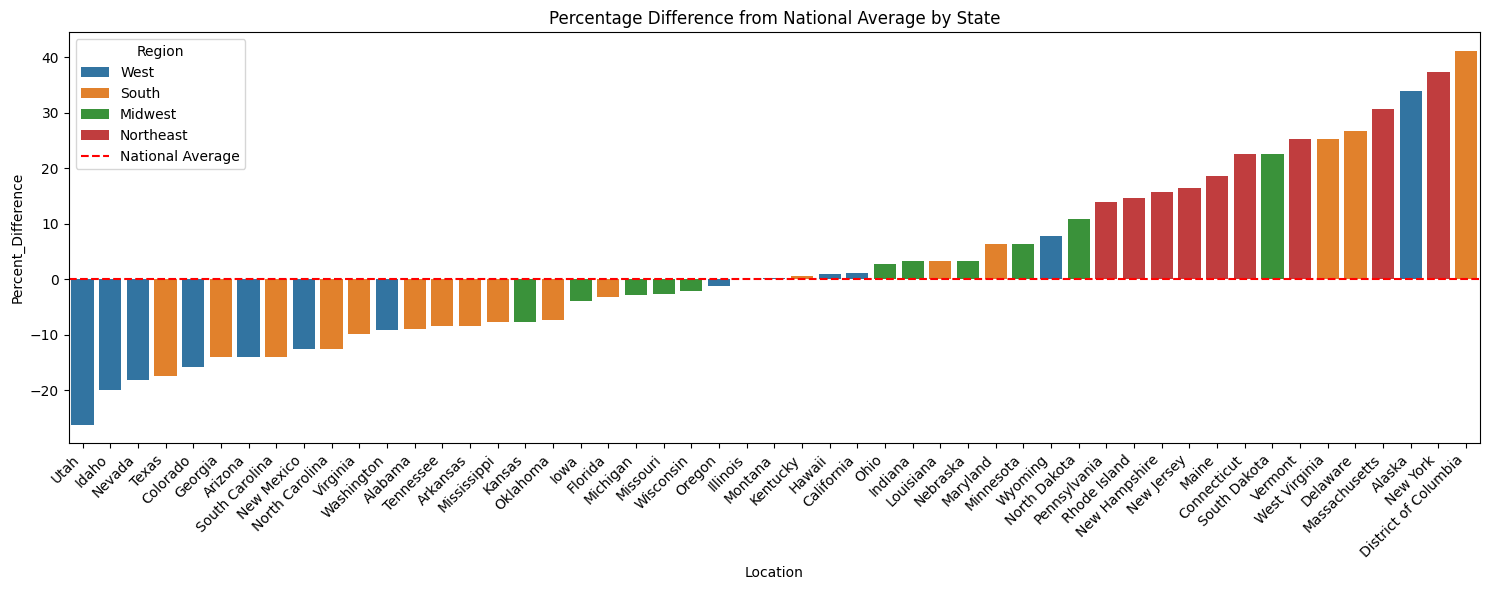

In [18]:
# Distance from National Average Analysis
# Calculate percentage difference from national average
state_data['Percent_Difference'] = ((state_data['Health Spending per Capita'] - us_average) / us_average * 100).round(1)

# Create categories for difference from average
state_data['Difference_Category'] = pd.cut(state_data['Percent_Difference'],
                                         bins=[-float('inf'), -20, -10, 0, 10, 20, float('inf')],
                                         labels=['Very Low', 'Low', 'Near Average (Lower)',
                                                'Near Average (Higher)', 'High', 'Very High'])

# Visualize
plt.figure(figsize=(15, 6))
sns.barplot(data=state_data.sort_values('Percent_Difference'),
            x='Location',
            y='Percent_Difference',
            hue='Region')
plt.axhline(y=0, color='r', linestyle='--', label='National Average')
plt.title('Percentage Difference from National Average by State')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [19]:
# Neighbor Analysis
# Define state neighbors
state_neighbors = {
    'New York': ['Connecticut', 'Massachusetts', 'Vermont', 'New Jersey', 'Pennsylvania'],
    'California': ['Oregon', 'Nevada', 'Arizona'],
    'Texas': ['New Mexico', 'Oklahoma', 'Arkansas', 'Louisiana'],
    'Florida': ['Georgia', 'Alabama'],
    'Illinois': ['Wisconsin', 'Indiana', 'Kentucky', 'Missouri', 'Iowa']
}

# Calculate differences
for state, neighbors in state_neighbors.items():
    state_spending = state_data[state_data['Location'] == state]['Health Spending per Capita'].values[0]
    neighbor_spending = state_data[state_data['Location'].isin(neighbors)]['Health Spending per Capita'].mean()
    diff_from_neighbors = ((state_spending - neighbor_spending) / neighbor_spending * 100).round(1)
    print(f"\n{state}:")
    print(f"State Spending: ${state_spending:,.2f}")
    print(f"Average Neighbor Spending: ${neighbor_spending:,.2f}")
    print(f"Difference from Neighbors: {diff_from_neighbors}%")


New York:
State Spending: $14,007.00
Average Neighbor Spending: $12,407.00
Difference from Neighbors: 12.9%

California:
State Spending: $10,299.00
Average Neighbor Spending: $9,058.33
Difference from Neighbors: 13.7%

Texas:
State Spending: $8,406.00
Average Neighbor Spending: $9,549.75
Difference from Neighbors: -12.0%

Florida:
State Spending: $9,865.00
Average Neighbor Spending: $9,019.00
Difference from Neighbors: 9.4%

Illinois:
State Spending: $10,190.00
Average Neighbor Spending: $10,093.20
Difference from Neighbors: 1.0%


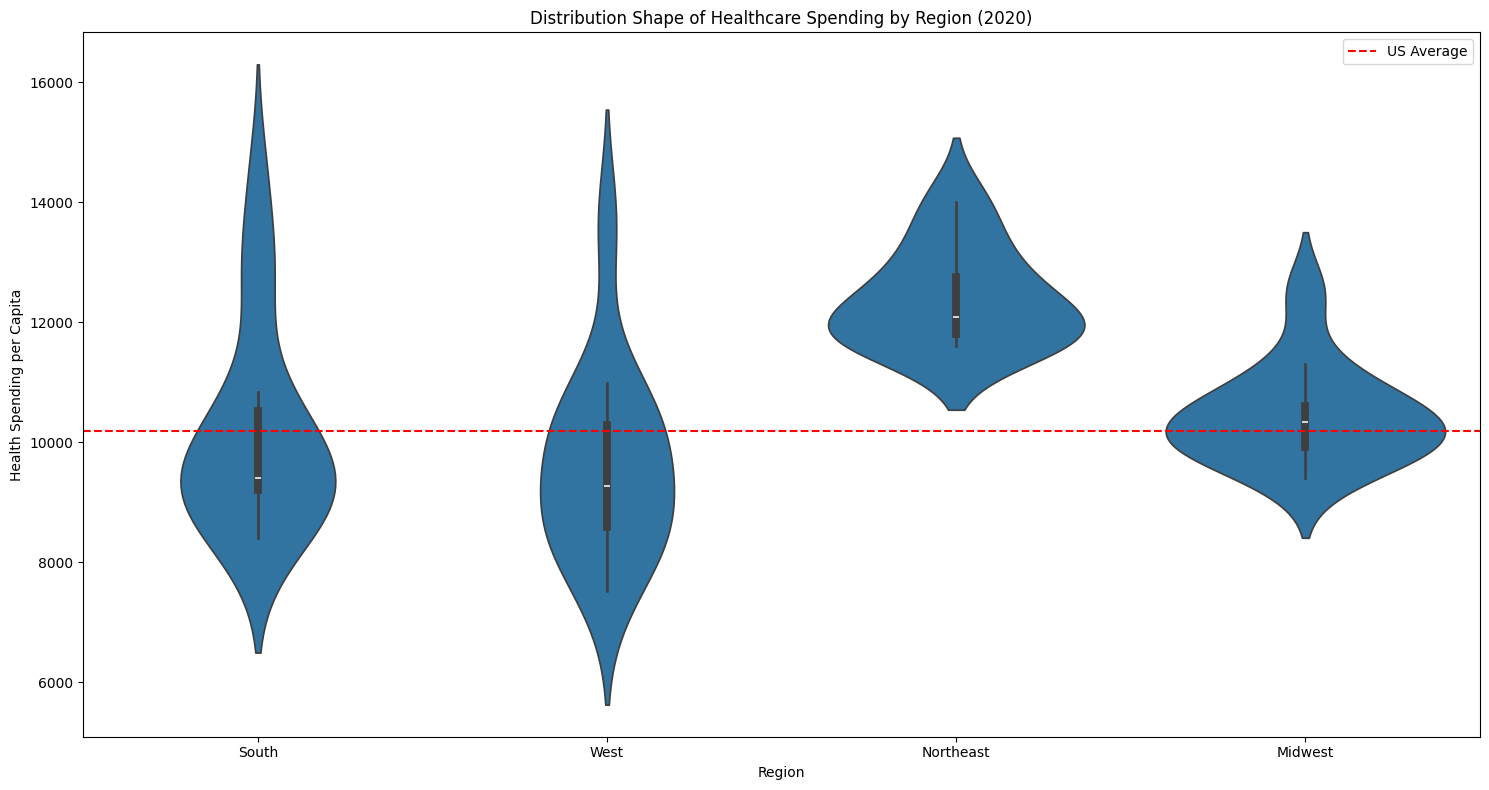


Northeast Region Analysis:
--------------------------------------------------
Number of States: 9
Mean Spending: $12,400.67
Median Spending: $12,077.00
Standard Deviation: $825.46
Range: $2,404.00
Skewness: 1.056

States in region (ordered by spending):
New York: $14,007.00
Massachusetts: $13,319.00
Vermont: $12,756.00
Connecticut: $12,489.00
Maine: $12,077.00
New Jersey: $11,868.00
New Hampshire: $11,793.00
Rhode Island: $11,694.00
Pennsylvania: $11,603.00

States above national average: 9 (100.0%)

Midwest Region Analysis:
--------------------------------------------------
Number of States: 12
Mean Spending: $10,444.83
Median Spending: $10,334.00
Standard Deviation: $823.91
Range: $3,087.00
Skewness: 1.461

States in region (ordered by spending):
South Dakota: $12,495.00
North Dakota: $11,301.00
Minnesota: $10,846.00
Indiana: $10,517.00
Nebraska: $10,514.00
Ohio: $10,478.00
Illinois: $10,190.00
Wisconsin: $9,982.00
Missouri: $9,921.00
Michigan: $9,897.00
Iowa: $9,789.00
Kansas: $9,4

In [20]:
# Create violin plot with enhanced features
plt.figure(figsize=(15, 8))
sns.violinplot(data=state_data, x='Region', y='Health Spending per Capita')
plt.axhline(y=us_average, color='r', linestyle='--', label='US Average')
plt.title('Distribution Shape of Healthcare Spending by Region (2020)')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

# Detailed statistical analysis for each region
for region in ['Northeast', 'Midwest', 'South', 'West']:
    region_data = state_data[state_data['Region'] == region]['Health Spending per Capita']
    
    print(f"\n{region} Region Analysis:")
    print("-" * 50)
    print(f"Number of States: {len(region_data)}")
    print(f"Mean Spending: ${region_data.mean():,.2f}")
    print(f"Median Spending: ${region_data.median():,.2f}")
    print(f"Standard Deviation: ${region_data.std():,.2f}")
    print(f"Range: ${region_data.max() - region_data.min():,.2f}")
    print(f"Skewness: {region_data.skew():,.3f}")  # Measure of distribution asymmetry
    
    # List states in this region with their spending
    print("\nStates in region (ordered by spending):")
    region_states = state_data[state_data['Region'] == region].sort_values('Health Spending per Capita', ascending=False)
    for _, row in region_states.iterrows():
        print(f"{row['Location']}: ${row['Health Spending per Capita']:,.2f}")

    # Calculate what percentage of states are above/below national average
    above_avg = sum(region_data > us_average)
    total_states = len(region_data)
    print(f"\nStates above national average: {above_avg} ({(above_avg/total_states*100):.1f}%)")

## Breakdown of violin plot based on region:

### Northeast
Key factors contributing to higher Northeast spending:
1. Economic Factors:
    - Higher cost of living.
    - Higher median household income.
    - Higher wages for healthcare workers.
    - More expensive medical facilities/operations.

2. Healthcare Infrastructure:
    - High concentration of teaching hospitals.
        - Train new doctors and specialists.
        - Conduct expensive research.
        - Treat more complex cases.
        - Use cutting-edge technology.
        - Higher operational costs.
    - Advanced medical research facilities.
        - Investment in new technologies
        - Clinical trials
        - Specialized equipment
        - Research staff costs
        - Innovation expenses
    - Higher density of specialists.
        - Higher salaries.
        - More expensive procedures.
        - Advanced treatment options.
        - More diagnostic tests.
        - Specialized equipment.
    - More medical schools and training facilities.

3. Demographic Factors:
    - Older population on average.
    - Higher population density.
    - More urban areas with advanced healthcare facilities.
    - Higher insurance coverage rates.

4. Policy Factors:
    - Stronger insurance regulations
        - Stronger individual mandate requirements.
        - More comprehensive coverage requirements.
        - Stricter insurance market regulations.
        - Higher minimum coverage standards.
        - **Impact**: Higher insurance costs but better coverage.
    - More comprehensive insurance requirements
    - Higher medical malpractice insurance costs
        - Higher malpractice insurance premiums.
        - Stronger patient protection laws.
        - More stringent reporting requirements.
        - Higher settlement amounts.
        - **Impact**: Increased operational costs and defensive medicine practices.
    - Stricter healthcare facility standards
        - Stricter staffing requirements.
        - Higher facility standards.
        - More frequent inspections.
        - Additional safety protocols.
        - **Impact**: Higher operational and compliance costs.

## Summary
These factors create a "high-cost, high-service" environment where:
- More advanced treatments are available
- More specialists are accessible
- More research is conducted
- More teaching occurs
- More complex cases are handled

Northeast Region Statistics:
--------------------------------------------------
Average Spending: $12,400.67
Median Spending: $12,077.00

State-by-State Breakdown:
New York: $14,007.00
Massachusetts: $13,319.00
Vermont: $12,756.00
Connecticut: $12,489.00
Maine: $12,077.00
New Jersey: $11,868.00
New Hampshire: $11,793.00
Rhode Island: $11,694.00
Pennsylvania: $11,603.00


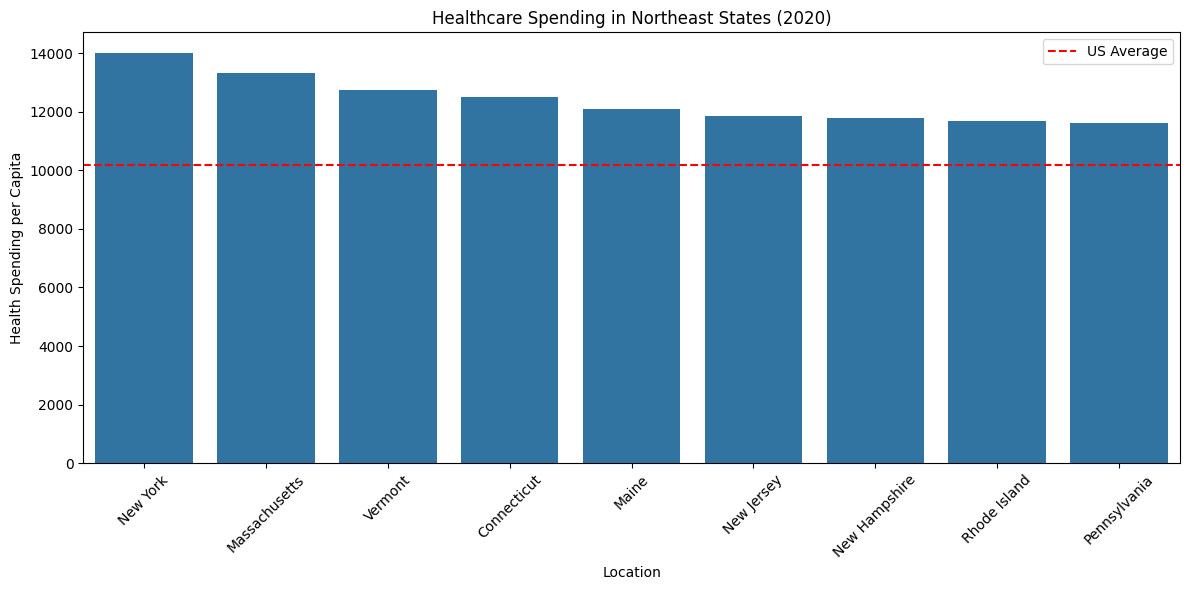


Percentage of Northeast states above national average: 100.0%


In [ ]:
# Northeast data analysis (based on the violin plot's visualisation)
northeast_data = state_data[state_data['Region'] == 'Northeast'].copy()

# Basic statistics
print("Northeast Region Statistics:")
print("-" * 50)
print(f"Average Spending: ${northeast_data['Health Spending per Capita'].mean():,.2f}")
print(f"Median Spending: ${northeast_data['Health Spending per Capita'].median():,.2f}")
print("\nState-by-State Breakdown:")
for _, row in northeast_data.sort_values('Health Spending per Capita', ascending=False).iterrows():
    print(f"{row['Location']}: ${row['Health Spending per Capita']:,.2f}")

# Visualization comparing Northeast states
plt.figure(figsize=(12, 6))
sns.barplot(data=northeast_data.sort_values('Health Spending per Capita', ascending=False),
            x='Location',
            y='Health Spending per Capita')
plt.axhline(y=us_average, color='r', linestyle='--', label='US Average')
plt.title('Healthcare Spending in Northeast States (2020)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate percentage above national average
percent_above = (northeast_data['Health Spending per Capita'] > us_average).mean() * 100
print(f"\nPercentage of Northeast states above national average: {percent_above:.1f}%")